In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
meanprops = dict(linestyle='-', linewidth=2, color='k', alpha=1)
whiskerprops=dict(linestyle='-', linewidth=0)


<ipython-input-2-e1e476268f6b>:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [5]:
exp_names = ["svhn",
            "cifar10",
            "cifar100",
            "super_cifar100",
            "camelyon",
            "animals",
            ]

df_list = []
for exp in exp_names:
    in_path = os.path.join("/Users/Paul/research/files/analysis/{}_paper_sweep.csv".format(exp))
    df =  pd.read_csv(in_path)
    df = df.dropna(subset=["name", "model"])
    df = df.drop_duplicates(subset=["name", "study", "model", "network", "confid"])
    if exp == "super_cifar100":
        df = df[df.study == "iid_study"]
        df["study"] = df.apply(lambda row: "cifar100_in_class_study_superclasses", axis=1)
    else:
        df["study"] = df.apply(lambda row: exp + "_" + row["study"], axis=1)
    df_list.append(df)

df = pd.concat(df_list)
exp_names = [e for e in exp_names if e !="super_cifar100"]

In [6]:
df.groupby("study").count()

Unnamed: 0  name  \
study                                                                          
animals_iid_study                                           295         295    
animals_in_class_study_wilds_animals_ood_test               295         295    
animals_val_tuning                                          295         295    
camelyon_iid_study                                          727         727    
camelyon_in_class_study_wilds_camelyon_ood_test             727         727    
camelyon_val_tuning                                         727         727    
cifar100_iid_study                                          730         730    
cifar100_in_class_study_superclasses                        730         730    
cifar100_new_class_study_cifar10_original_mode              730         730    
cifar100_new_class_study_cifar10_proposed_mode              730         730    
cifar100_new_class_study_svhn_original_mode                 730         730    
cifar100_new_class_study_svhn_proposed_mode                 730         730    
cifar100_new_class_study_tinyimagenet_original_mode         730         730    
cifar100_new_class_study_tinyimagenet_proposed_mode         730         730    
cifar100_new_class_study_tinyimagenet_resize_original_mode  730         730    
cifar100_new_class_study_tinyimagenet_resize_proposed_mode  730         730    
cifar100_noise_study_1                                      730         730    
cifar100_noise_study_2                                      730         730    
cifar100_noise_study_3                                      730         730    
cifar100_noise_study_4                                      730         730    
cifar100_noise_study_5                                      730         730    
cifar100_val_tuning                                         730         730    
cifar10_iid_study                                           767         767    
cifar10_new_class_study_cifar100_original_mode              767         767    
cifar10_new_class_study_cifar100_proposed_mode              767         767    
cifar10_new_class_study_svhn_original_mode                  767         767    
cifar10_new_class_study_svhn_proposed_mode                  767         767    
cifar10_new_class_study_tinyimagenet_original_mode          767         767    
cifar10_new_class_study_tinyimagenet_proposed_mode          767         767    
cifar10_new_class_study_tinyimagenet_resize_original_mode   767         767    
cifar10_new_class_study_tinyimagenet_resize_proposed_mode   767         767    
cifar10_noise_study_1                                       767         767    
cifar10_noise_study_2                                       767         767    
cifar10_noise_study_3                                       767         767    
cifar10_noise_study_4                                       767         767    
cifar10_noise_study_5                                       767         767    
cifar10_val_tuning                                          767         767    
svhn_iid_study                                              365         365    
svhn_new_class_study_cifar100_original_mode                 365         365    
svhn_new_class_study_cifar100_proposed_mode                 365         365    
svhn_new_class_study_cifar10_original_mode                  365         365    
svhn_new_class_study_cifar10_proposed_mode                  365         365    
svhn_new_class_study_tinyimagenet_original_mode             365         365    
svhn_new_class_study_tinyimagenet_proposed_mode             365         365    
svhn_new_class_study_tinyimagenet_resize_original_mode      365         365    
svhn_new_class_study_tinyimagenet_resize_proposed_mode      365         365    
svhn_val_tuning                                             365         365    

                                                            model  network  \
study                                                        

In [7]:
df["backbone"] = df.apply(lambda row: row["name"].split("bb")[1].split("_")[0], axis=1)
df["dropout"] = df.apply(lambda row: row["name"].split("do")[1].split("_")[0], axis=1)
df["model"] = df.apply(lambda row: row["name"].split("_")[0], axis=1)
df["run"] = df.apply(lambda row: row["name"].split("run")[1].split("_")[0], axis=1)
df["rew"] = df.apply(lambda row: row["name"].split("_rew")[1].split("_")[0], axis=1)
df["confid"] = df.apply(lambda row: row["model"] + "_" + row["confid"] + "_" + row["dropout"] + "_" + row["rew"], axis=1)
df = df.drop("model", axis=1)
df = df.drop("dropout", axis=1)


df = df[((df.study.str.startswith("cifar10")) & (df.backbone == "vgg13")) | ~(df.study.str.startswith("cifar10"))]
df = df.drop("backbone", axis=1)
print(len(df))

16981


In [8]:
df.groupby("study").count()

Unnamed: 0  name  \
study                                                                          
animals_iid_study                                           295         295    
animals_in_class_study_wilds_animals_ood_test               295         295    
animals_val_tuning                                          295         295    
camelyon_iid_study                                          727         727    
camelyon_in_class_study_wilds_camelyon_ood_test             727         727    
camelyon_val_tuning                                         727         727    
cifar100_iid_study                                          365         365    
cifar100_in_class_study_superclasses                        365         365    
cifar100_new_class_study_cifar10_original_mode              365         365    
cifar100_new_class_study_cifar10_proposed_mode              365         365    
cifar100_new_class_study_svhn_original_mode                 365         365    
cifar100_new_class_study_svhn_proposed_mode                 365         365    
cifar100_new_class_study_tinyimagenet_original_mode         365         365    
cifar100_new_class_study_tinyimagenet_proposed_mode         365         365    
cifar100_new_class_study_tinyimagenet_resize_original_mode  365         365    
cifar100_new_class_study_tinyimagenet_resize_proposed_mode  365         365    
cifar100_noise_study_1                                      365         365    
cifar100_noise_study_2                                      365         365    
cifar100_noise_study_3                                      365         365    
cifar100_noise_study_4                                      365         365    
cifar100_noise_study_5                                      365         365    
cifar100_val_tuning                                         365         365    
cifar10_iid_study                                           295         295    
cifar10_new_class_study_cifar100_original_mode              295         295    
cifar10_new_class_study_cifar100_proposed_mode              295         295    
cifar10_new_class_study_svhn_original_mode                  295         295    
cifar10_new_class_study_svhn_proposed_mode                  295         295    
cifar10_new_class_study_tinyimagenet_original_mode          295         295    
cifar10_new_class_study_tinyimagenet_proposed_mode          295         295    
cifar10_new_class_study_tinyimagenet_resize_original_mode   295         295    
cifar10_new_class_study_tinyimagenet_resize_proposed_mode   295         295    
cifar10_noise_study_1                                       295         295    
cifar10_noise_study_2                                       295         295    
cifar10_noise_study_3                                       295         295    
cifar10_noise_study_4                                       295         295    
cifar10_noise_study_5                                       295         295    
cifar10_val_tuning                                          295         295    
svhn_iid_study                                              365         365    
svhn_new_class_study_cifar100_original_mode                 365         365    
svhn_new_class_study_cifar100_proposed_mode                 365         365    
svhn_new_class_study_cifar10_original_mode                  365         365    
svhn_new_class_study_cifar10_proposed_mode                  365         365    
svhn_new_class_study_tinyimagenet_original_mode             365         365    
svhn_new_class_study_tinyimagenet_proposed_mode             365         365    
svhn_new_class_study_tinyimagenet_resize_original_mode      365         365    
svhn_new_class_study_tinyimagenet_resize_proposed_mode      365         365    
svhn_val_tuning                                             365         365    

                                                            network  fold  \
study                                                         

In [20]:
# NUMBER TABLES

metric = "aurc"
non_agg_columns = ["study", "confid", "rew"]
filter_metrics_df = df[["study", "confid", "run", "rew", metric]]
df_mean = filter_metrics_df.groupby(by=non_agg_columns).mean().reset_index().round(3)
df_std = filter_metrics_df.groupby(by=non_agg_columns).std().reset_index().round(3)

studies = df_mean.study.unique().tolist()
dff = df_mean[df_mean.study=="camelyon_iid_study"][["confid", "rew"]]
print("CHECK LEN DFF", len(dff), len(df_mean))
print(df_mean)
combine_and_str = False
if combine_and_str:
    agg_mean_std = lambda s1, s2: s1  if (s1.name == "confid" or s1.name == "study" or s1.name=="rew") else s1.astype(str) + " ± " + s2.astype(str)
    df_mean = df_mean.combine(df_std, agg_mean_std)
    for s in studies:
        sdf = df_mean[df_mean.study == s]
        dff[s] = dff["confid"].map(sdf.set_index("confid")[metric])


else:
    for s in studies:
        sdf = df_mean[df_mean.study == s]
        dff[s] = dff["confid"].map(sdf.set_index("confid")[metric])
        # print("DFF", dff.columns.tolist())


CHECK LEN DFF 73 3179
                  study                   confid  rew    aurc
0     animals_iid_study  confidnet_det_mcp_0_2.2  2.2  63.335
1     animals_iid_study  confidnet_det_mcp_1_2.2  2.2  70.403
2     animals_iid_study  confidnet_det_pe_0_2.2   2.2  62.666
3     animals_iid_study  confidnet_det_pe_1_2.2   2.2  69.514
4     animals_iid_study  confidnet_mcd_ee_1_2.2   2.2  53.861
...                 ...                     ...   ...     ...
3174  svhn_val_tuning    dg_mcd_sv_1_6            6    4.259 
3175  svhn_val_tuning    dg_mcd_waic_1_10         10   4.934 
3176  svhn_val_tuning    dg_mcd_waic_1_2.2        2.2  4.163 
3177  svhn_val_tuning    dg_mcd_waic_1_3          3    4.093 
3178  svhn_val_tuning    dg_mcd_waic_1_6          6    4.055 

[3179 rows x 4 columns]


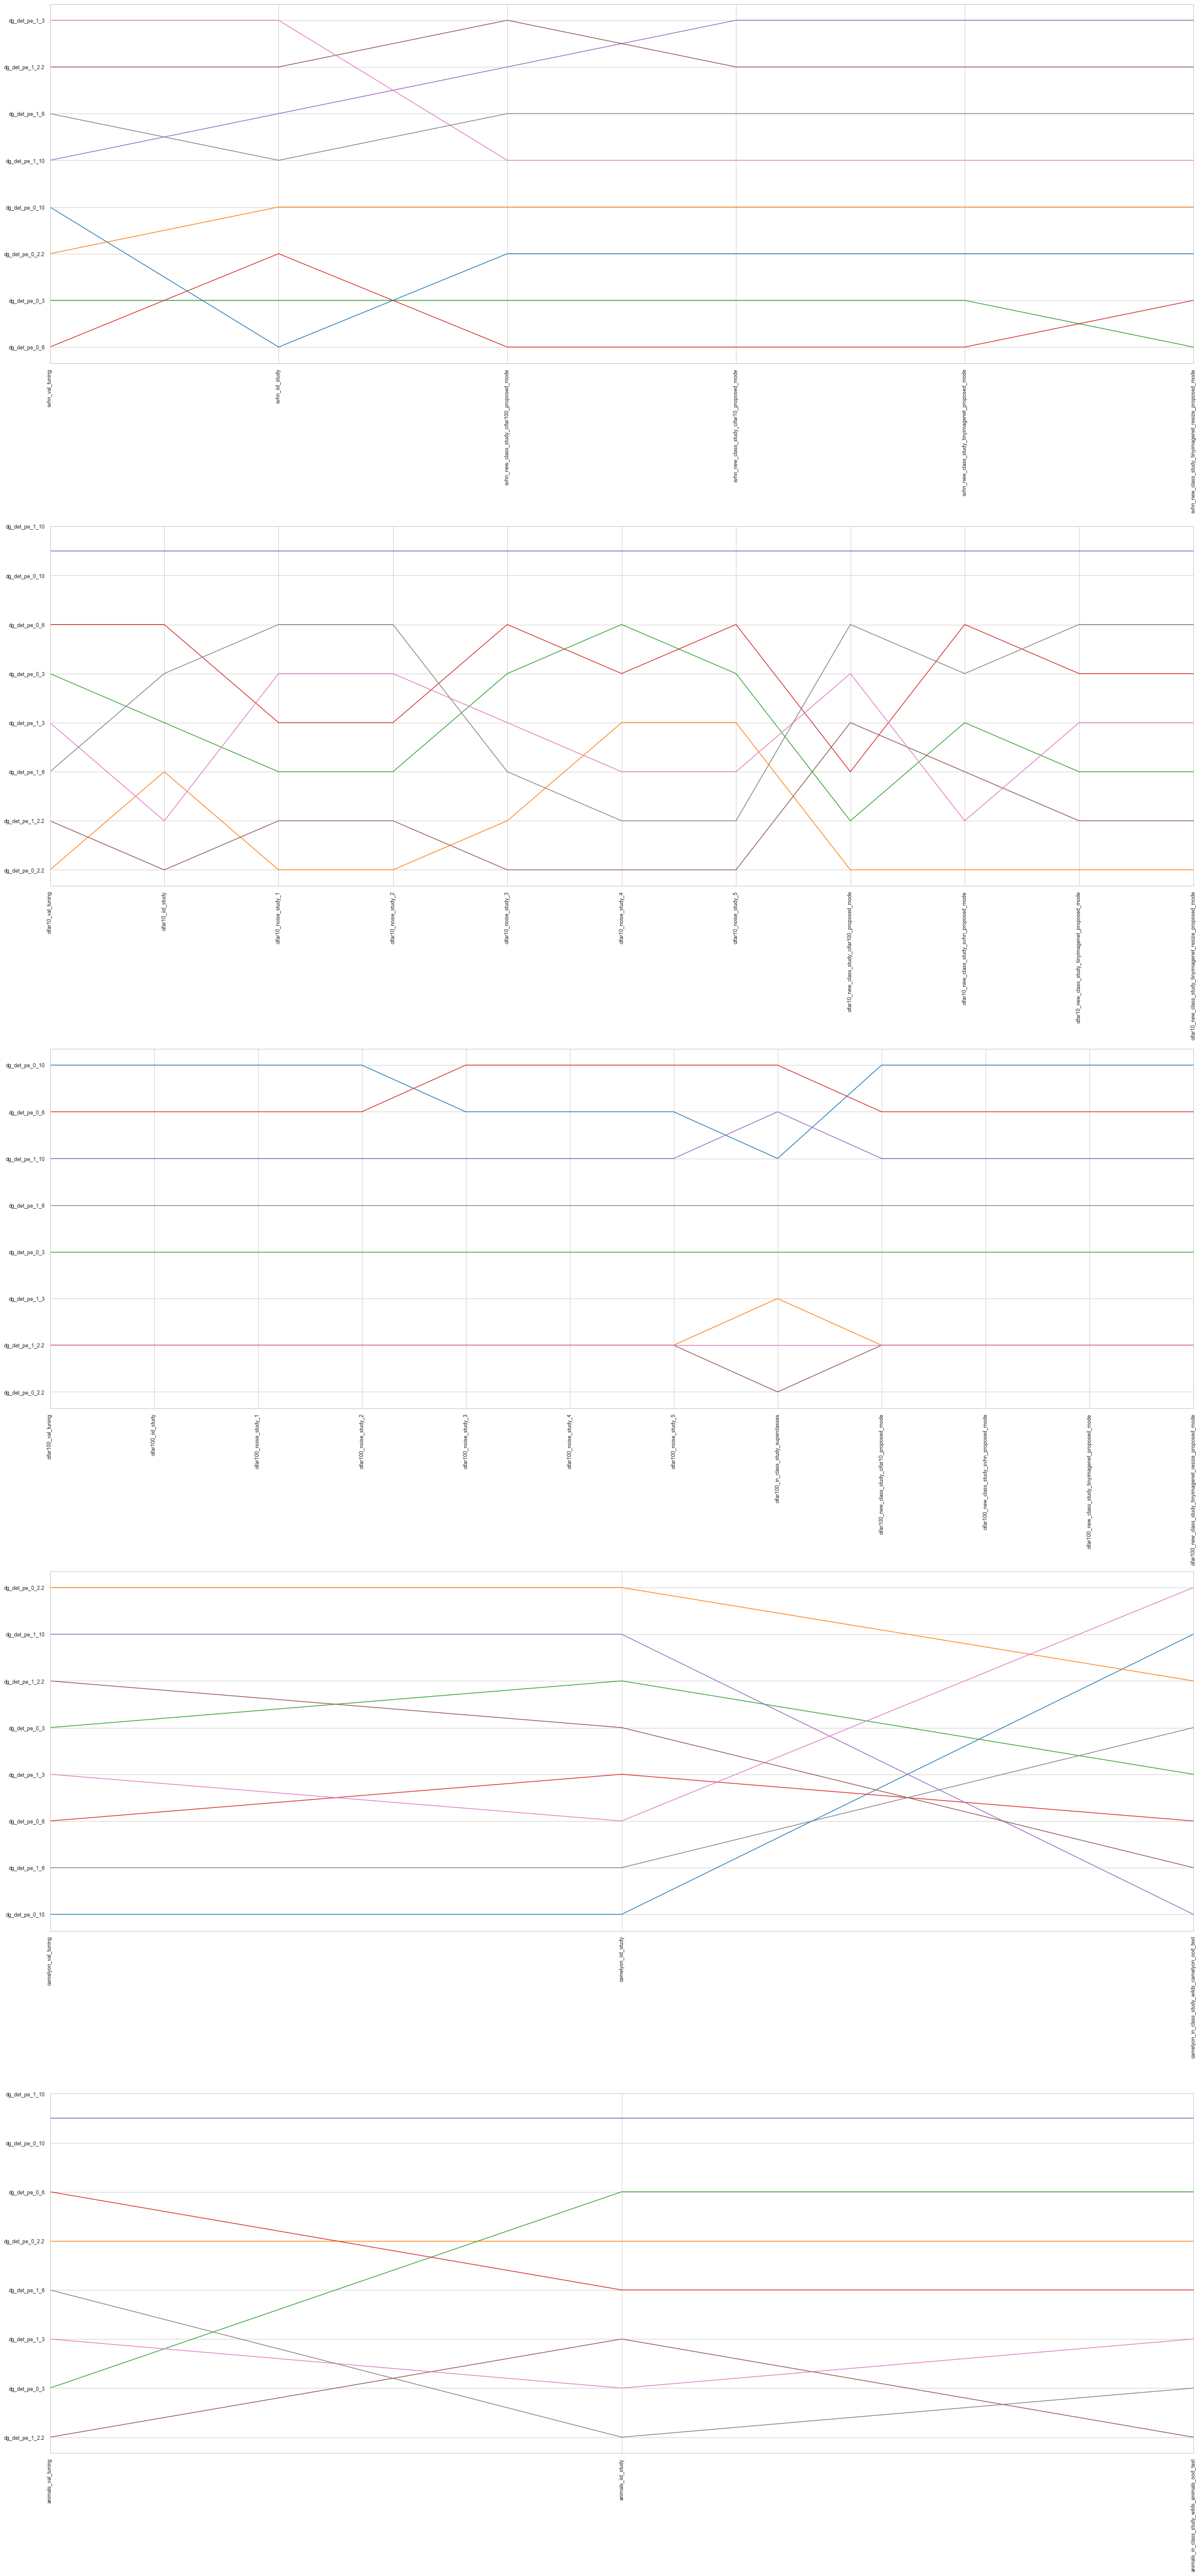

In [21]:
# RANKING PLOTS
# dff = dff[["confid", "rew"] + [c for c in dff.columns if  c.startswith("cifar100")]]
select_df = dff[dff.confid.str.contains("dg_det_pe")]
rank_df = select_df.rank(na_option="bottom", numeric_only=True, ascending=False)
# actually aurc should be ranked ascedingly, but we want the lowest rank to show on top on the y axis
# so careful when using this df for other things than this plot!

rank_df["confid"] = dff.confid
scale = 10
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=scale * 0.10)
f, axs = plt.subplots(nrows=len(exp_names), ncols=1, figsize=(2.8*scale, len(exp_names)*scale * 1.2))
# todo ! supercifar has to be a part of cifar100 exp. check also weird observation regarding val_tuning
for ax_ix, exp in enumerate(exp_names):
        cols = [c for c in rank_df.columns if c.startswith(exp + "_")]
        cols = ["{}_val_tuning".format(exp), "{}_iid_study".format(exp)] + [c for c in cols if "noise" in c] + [c for c in cols if "in_class" in c] + [c for c in cols if "proposed" in c]
        numeric_exp_df = rank_df[cols]
        # todo DROPNAN?
        confids_list = rank_df.confid.tolist()
        x = range(len(numeric_exp_df.columns))
        for ix in range(len(numeric_exp_df)):
            y = numeric_exp_df.iloc[ix].values
            axs[ax_ix].plot(x, y)
        axs[ax_ix].set_yticks(range(1, len(numeric_exp_df) + 1))
        axs[ax_ix].set_yticklabels(rank_df[["confid"] + [c for c in rank_df.columns if c.startswith(exp)]].sort_values(by=numeric_exp_df.columns[0]).confid.tolist())
        axs[ax_ix].set_xticks(x)
        axs[ax_ix].set_xticklabels([c for c in numeric_exp_df.columns], rotation = 90)
        axs[ax_ix].set_xlim(0, len(numeric_exp_df.columns) - 1)

plt.tight_layout()
plt.show()

['svhn_val_tuning', 'svhn_iid_study', 'svhn_new_class_study_tinyimagenet_original_mode', 'svhn_new_class_study_tinyimagenet_proposed_mode', 'svhn_new_class_study_tinyimagenet_resize_original_mode', 'svhn_new_class_study_tinyimagenet_resize_proposed_mode', 'svhn_new_class_study_cifar10_original_mode', 'svhn_new_class_study_cifar10_proposed_mode', 'svhn_new_class_study_cifar100_original_mode', 'svhn_new_class_study_cifar100_proposed_mode'] Index(['study', 'confid', 'run', 'rew', 'aurc'], dtype='object')
['cifar10_val_tuning', 'cifar10_iid_study', 'cifar10_noise_study_1', 'cifar10_noise_study_2', 'cifar10_noise_study_3', 'cifar10_noise_study_4', 'cifar10_noise_study_5', 'cifar10_new_class_study_tinyimagenet_original_mode', 'cifar10_new_class_study_tinyimagenet_proposed_mode', 'cifar10_new_class_study_tinyimagenet_resize_original_mode', 'cifar10_new_class_study_tinyimagenet_resize_proposed_mode', 'cifar10_new_class_study_cifar100_original_mode', 'cifar10_new_class_study_cifar100_proposed_m

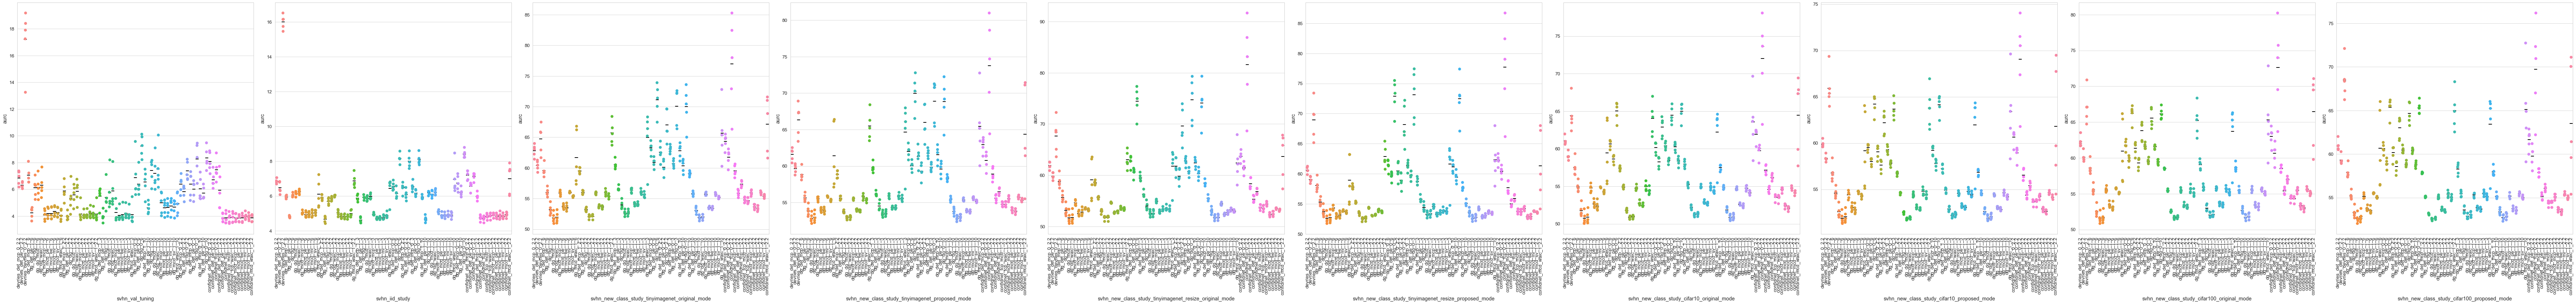

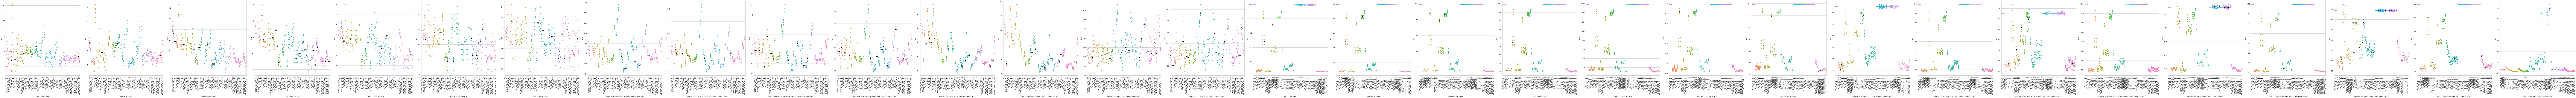

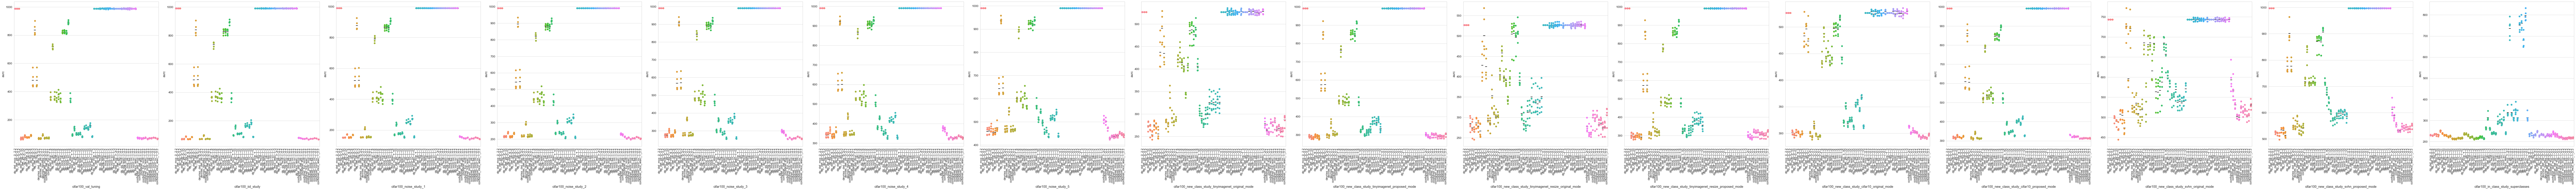

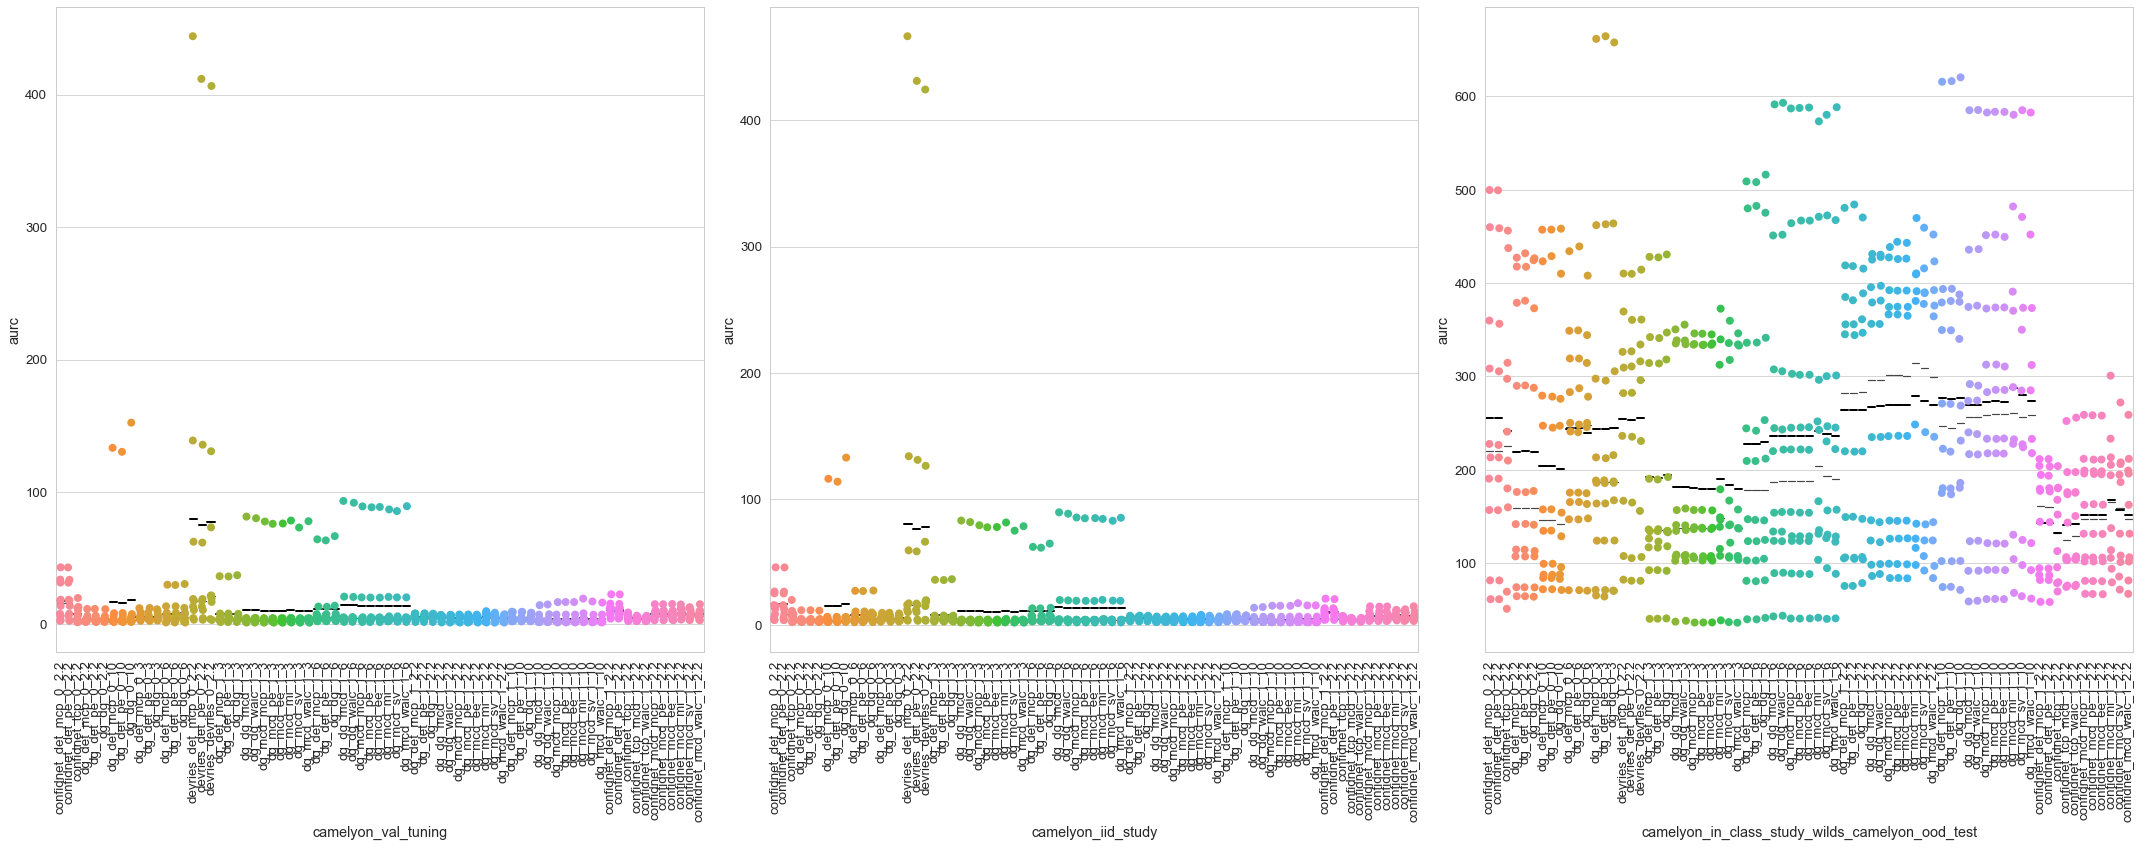

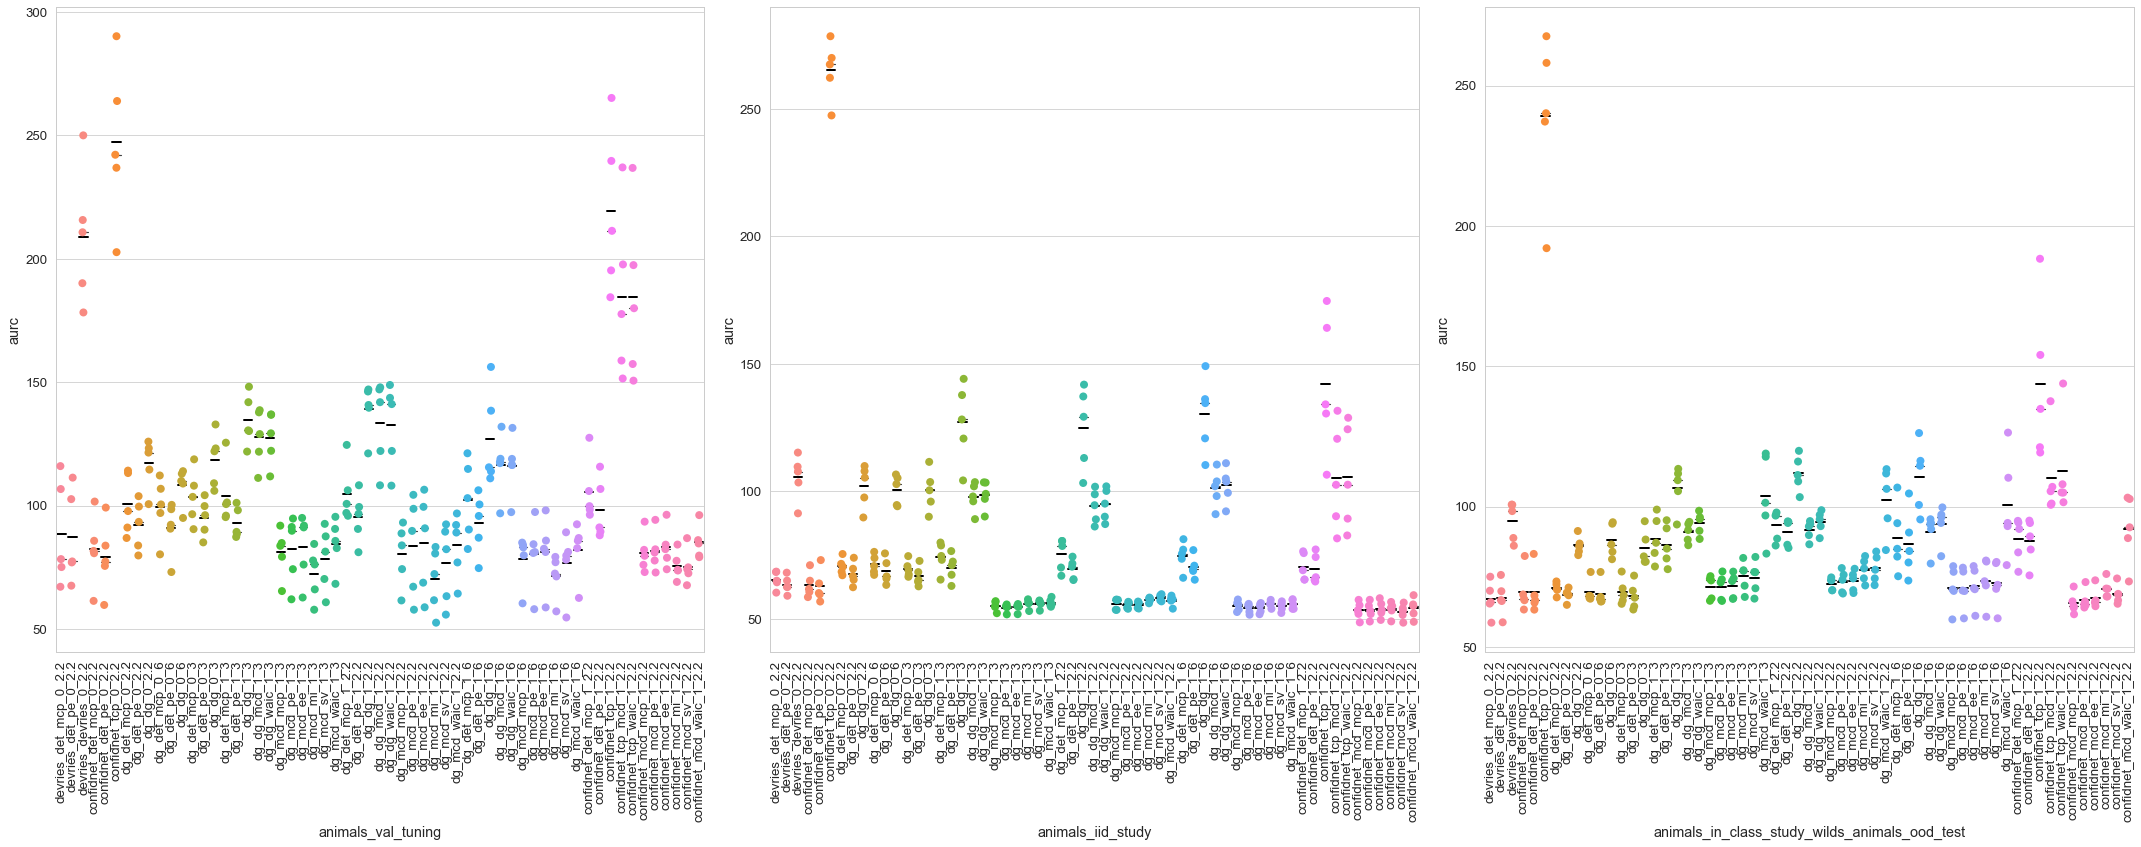

In [22]:
# OVERVOEW PLOTS

metrics = ["aurc"]#["aurc", "accuracy", "failauc"]
scale = 10
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=scale * 0.15)
dims = ["confid"]

for metric in metrics:
    if metric != "accuracy":
        for exp in exp_names:
            plot_data = df[df.study.str.startswith(exp)][["study", "confid", "run", "rew", metric]] # & (data["ne"].str.contains("250")) & (data["ap"]==False)]
            studies = plot_data.study.unique().tolist()
            print(studies, plot_data.columns)
            f, axs = plt.subplots(nrows=len(dims), ncols=len(studies), figsize=(len(studies)*scale, len(dims)*scale * 1.2))
            for xix, dim in enumerate(dims):
                for yix, study in enumerate(studies):
                    y = metric
                    sns.stripplot(ax=axs[yix], x=dim, y=metric, data=plot_data[plot_data.study == study], s = scale*0.8)
                    sns.boxplot(ax=axs[yix], x=dim, y=metric, data=plot_data[plot_data.study == study], saturation=0, showbox=False, showcaps=False, showfliers=False, whiskerprops=whiskerprops, showmeans=True, meanprops=meanprops, meanline=True)
                    axs[yix].set_xticklabels(axs[yix].get_xticklabels(),rotation=90)
                    axs[yix].set_xlabel(study)
                    # if "iid" in study and metric == "aurc":
                    #     axs[xix, yix].set_ylim(4, 8)
                    # if "iid" in study and metric == "failauc":
                    #     axs[xix, yix].set_ylim(0.90, 0.96)
            plt.tight_layout()
            plt.savefig("/Users/Paul/research/files/analysis/paper_{}_{}.png".format(exp, metric))
    else:
        # plot_data = df[df.study.str.startswith(exp)][["study", "confid", "run", "rew", metric]] # & (data["ne"].str.contains("250")) & (data["ap"]==False)]
        plot_data = df[df.study.str.contains("iid_study")][["study", "confid", "run", "rew", metric]]
        print(studies, plot_data.columns)
        f, axs = plt.subplots(nrows=len(dims), ncols=len(exp_names), figsize=(len(exp_names)*scale, len(dims)*scale * 1.2))
        for xix, dim in enumerate(dims):
            for yix, exp in enumerate(exp_names):
                y = metric
                sns.stripplot(ax=axs[yix], x=dim, y=metric, data=plot_data[plot_data.study == "{}_iid_study".format(exp)], s = scale*0.8)
                sns.boxplot(ax=axs[yix], x=dim, y=metric, data=plot_data[plot_data.study == "{}_iid_study".format(exp)], saturation=0, showbox=False, showcaps=False, showfliers=False, whiskerprops=whiskerprops, showmeans=True, meanprops=meanprops, meanline=True)
                axs[yix].set_xticklabels(axs[yix].get_xticklabels(),rotation=90)
                axs[yix].set_xlabel(exp)
                # if "iid" in study and metric == "aurc":
                #     axs[xix, yix].set_ylim(4, 8)
                # if "iid" in study and metric == "failauc":
                #     axs[xix, yix].set_ylim(0.90, 0.96)
        plt.tight_layout()
        plt.savefig("/Users/Paul/research/files/analysis/paper_iid_accuracies.png")






In [ ]:
df[(df.study == "iid_study") & (df.dropout == "1")]

In [ ]:
import numpy as np
np.std([0.95000, 0.94633, 1])
np.std([95.000, 94.633], ddof=1)